In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

# Chi square test 

In [2]:
cars = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\Datasets\Cars93.csv")
cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,21.1,7,187,115,72,38,34.0,NaN,3960,non-USA
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,18.5,5,180,103,67,35,31.5,14.0,2985,non-USA
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,18.5,4,159,97,66,36,26.0,15.0,2810,non-USA
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,15.8,5,190,104,67,37,29.5,14.0,2985,non-USA


In [3]:
pd.crosstab(index=cars['Type'], columns=cars['AirBags'], margins=True)

AirBags,Driver & Passenger,Driver only,None,All
Type,,,,
Compact,2,9,5,16
Large,4,7,0,11
Midsize,7,11,4,22
Small,0,5,16,21
Sporty,3,8,3,14
Van,0,3,6,9
All,16,43,34,93


In [4]:
# Taking cross-Table in ctab
ctab = pd.crosstab(index=cars['Type'],columns=cars['AirBags'])
ctab

AirBags,Driver & Passenger,Driver only,None
Type,,,
Compact,2,9,5
Large,4,7,0
Midsize,7,11,4
Small,0,5,16
Sporty,3,8,3
Van,0,3,6


In [5]:
# Calculating P_value using chi2_contingency

# H0 - Type of car and AirBags in a car are not related Independent
# H1 - Type of car and AirBags in a car are  related Dependent

test_statistics, p_value, df, expected_frequency = chi2_contingency(ctab)
print("P-Value =", p_value)

# Conclusion: We reject H0
# So Type of car and AirBags in a car are related (Dependent on each other)

P-Value = 0.000272287749055816


In [6]:
# Reshaping cross-Table using .melt
df_bar = pd.melt(ctab.reset_index(), id_vars="Type")
df_bar

,Type,AirBags,value
0,Compact,Driver & Passenger,2
1,Large,Driver & Passenger,4
2,Midsize,Driver & Passenger,7
3,Small,Driver & Passenger,0
4,Sporty,Driver & Passenger,3
5,Van,Driver & Passenger,0
6,Compact,Driver only,9
7,Large,Driver only,7
8,Midsize,Driver only,11
9,Small,Driver only,5


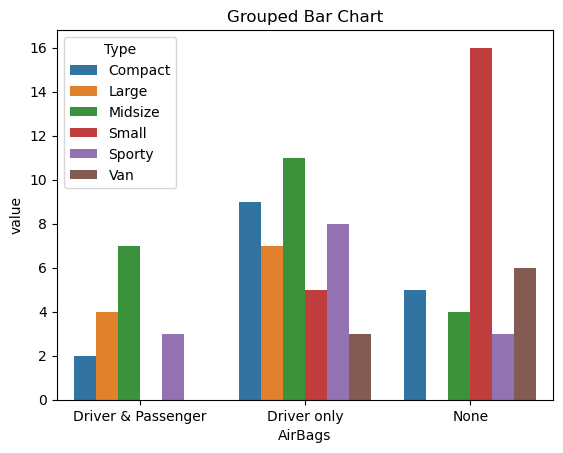

In [7]:
# Plotting bar-Plot
sns.barplot(x="AirBags", y="value", hue="Type", data=df_bar)
plt.title("Grouped Bar Chart")
plt.show()

In [8]:
# Exploratory Data Analysis

In [9]:
big_mart = pd.read_csv(r"C:\Users\patil\Desktop\Know IT CADC\Adv Analytics\Datasets\big_mart_train.csv")
big_mart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


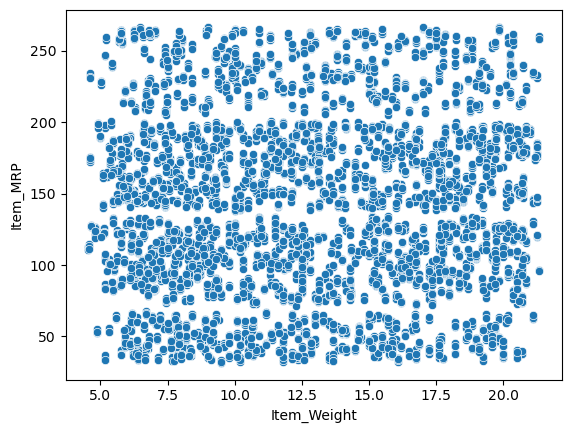

In [10]:
sns.scatterplot(data=big_mart, x='Item_Weight', y='Item_MRP')
plt.show()

In [11]:
big_mart['Item_Outlet_Sales'].isna().sum()

0

In [12]:
big_mart['Item_Type'].isna().sum()

0

In [13]:
ols_typ = ols('Item_Outlet_Sales ~ Item_Type', data=big_mart).fit()
table = anova_lm(ols_typ, typ=2)
print(table)

                 sum_sq      df         F    PR(>F)
Item_Type  1.176182e+08    15.0  2.700653  0.000388
Residual   2.469965e+10  8507.0       NaN       NaN


In [14]:
compare = pairwise_tukeyhsd(big_mart['Item_Outlet_Sales'], big_mart['Item_Type'], alpha=0.05)
pd.DataFrame(compare._results_table.data)

C:\Users\patil\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,Baking Goods,Breads,251.161,0.8352,-182.986,685.3081,False
2,Baking Goods,Breakfast,158.8374,0.9999,-443.3506,761.0255,False
3,Baking Goods,Canned,272.2237,0.2268,-52.0722,596.5196,False
4,Baking Goods,Dairy,279.5714,0.1728,-40.7806,599.9234,False
...,...,...,...,...,...,...,...
116,Seafood,Soft Drinks,-319.5542,0.9911,-1100.2292,461.1208,False
117,Seafood,Starchy Foods,48.2668,1.0,-825.365,921.8987,False
118,Snack Foods,Soft Drinks,-270.81,0.2338,-594.9209,53.3009,False
119,Snack Foods,Starchy Foods,97.011,1.0,-411.7394,605.7615,False


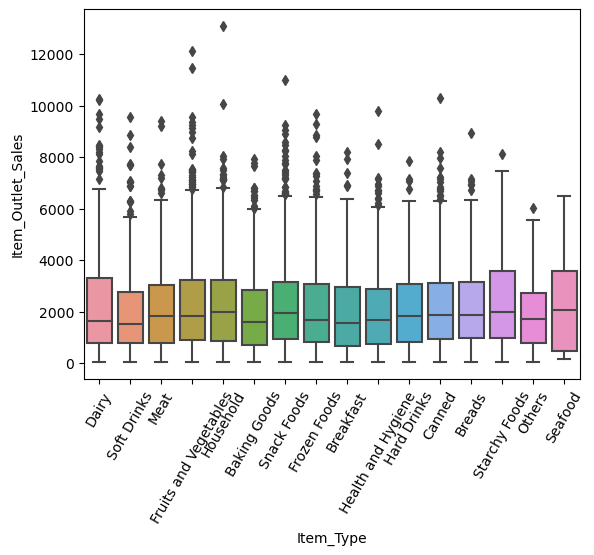

In [15]:
# Box-plot
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=big_mart)
plt.xticks(rotation=60)
plt.show()